In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart-disease-uci']


In [2]:
#Reading the data available! 
df=pd.read_csv("../input/heart-disease-uci/heart.csv")

In [3]:
#Viewing data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
# EDA for values contained in each column.
for i in df.columns:
  print(i, df[i].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

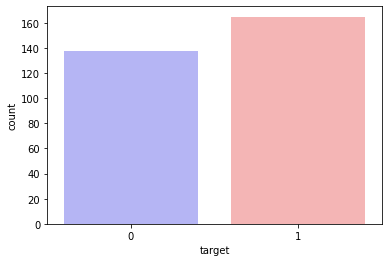

In [9]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [10]:
# For the percentage of the relationship between the features and the target.
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

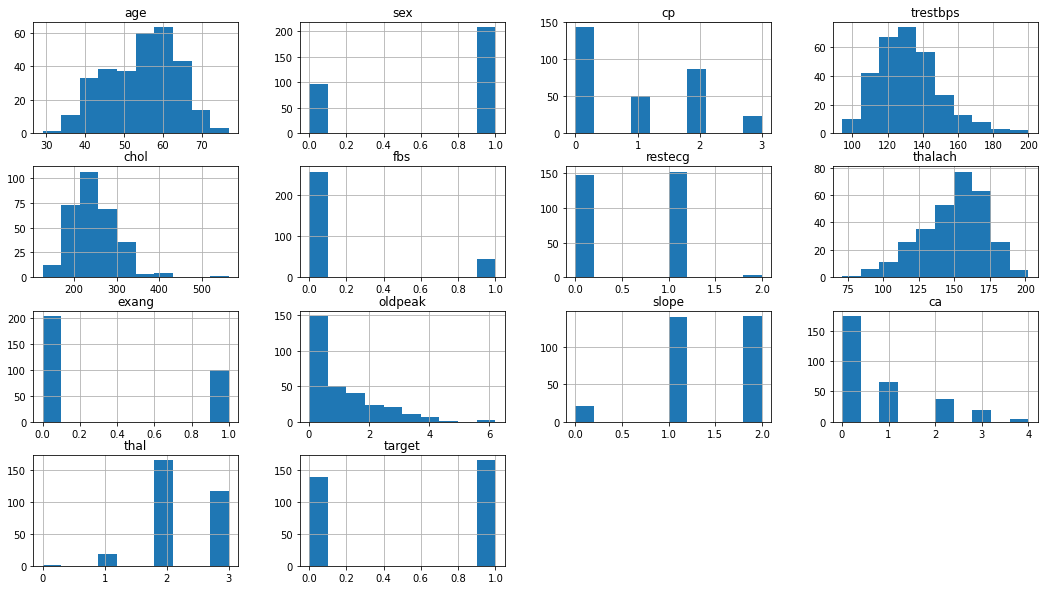

In [11]:
#GENERAL DATA EXPLORATION 

df.hist(figsize=(18,10))
plt.show()

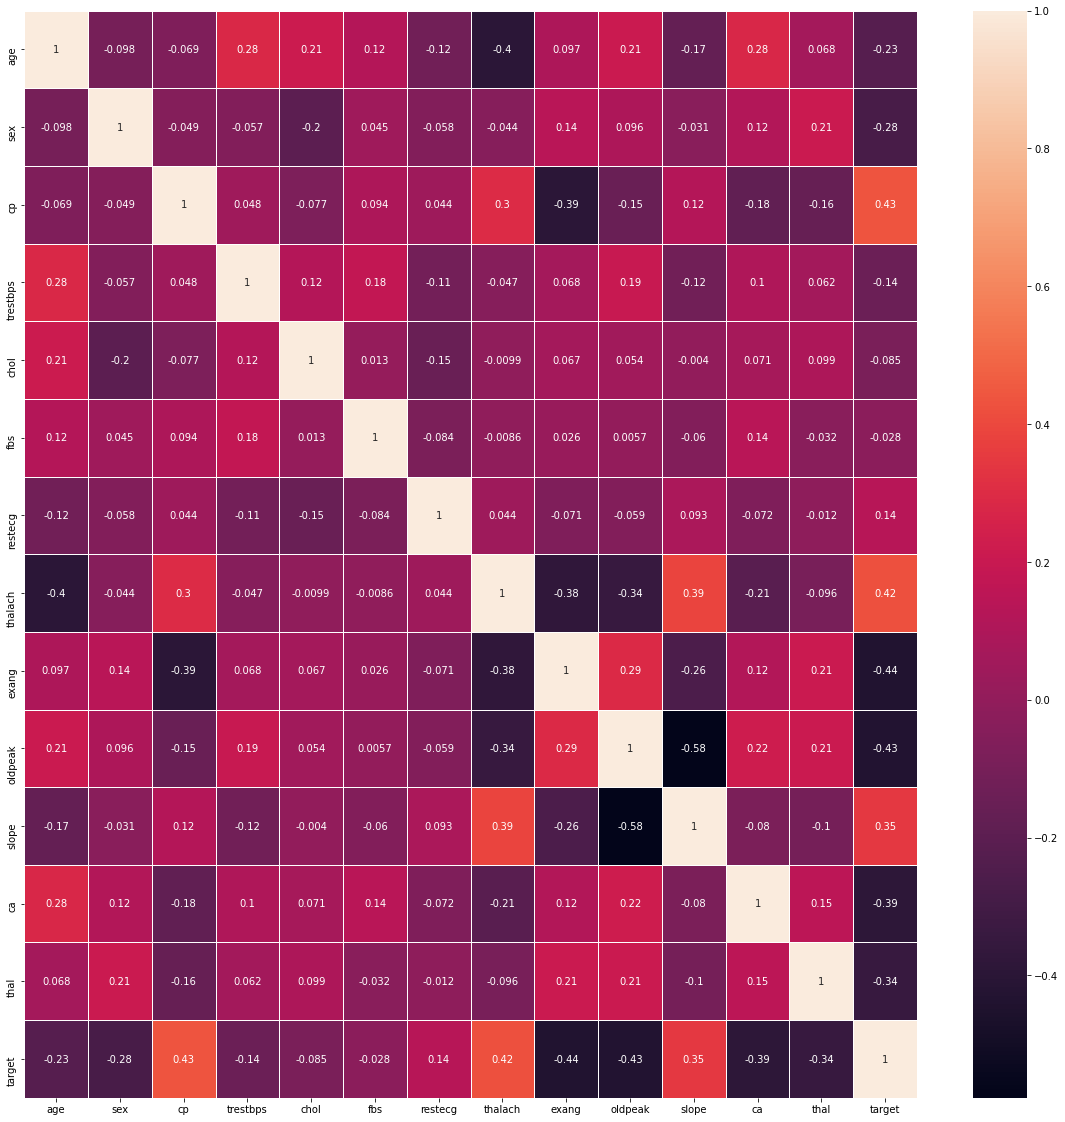

In [12]:
#HEATMAP FOR GENERAL DATA EXPLORATION 

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

**EDA FOR EACH COLUMN**

In [13]:
#EDA FOR AGE COLUMN 

from scipy.stats import norm
#descriptive statistics summary
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [14]:
df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Age Column Distribution')

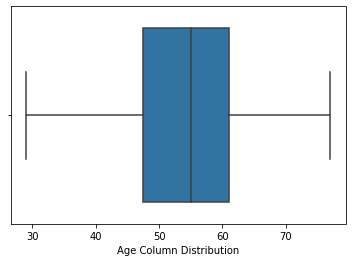

In [15]:
sns.boxplot('age',data=df) 
plt.xlabel('Age Column Distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


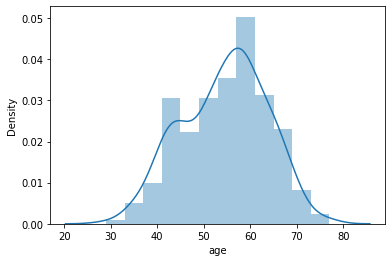

In [16]:
#HIstogram for age distribution in the dataset 
sns.distplot(df['age']);

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df['age'].skew())
print("Kurtosis: %f" % df['age'].kurt())
df.head(10)

Skewness: -0.202463
Kurtosis: -0.542167


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


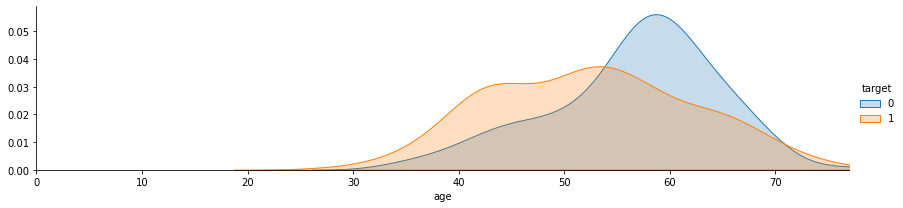

In [18]:
# the normal distribution of disease prevalence between different ages.

fig = sns.FacetGrid(df, hue="target",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

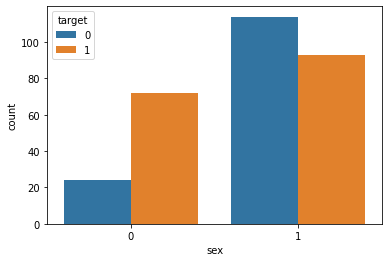

In [19]:
sns.countplot('sex', data=df,hue='target')

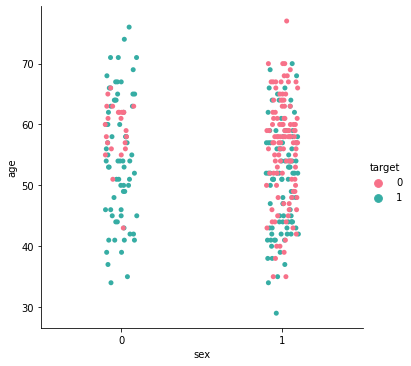

In [20]:
sns.catplot(data=df,x="sex" , y="age" , hue="target" , palette="husl")

In [21]:
#EDA FOR trestbps(BLOOD PRESSURE) COLUMN 

df["trestbps"].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'trestbps Column Distribution')

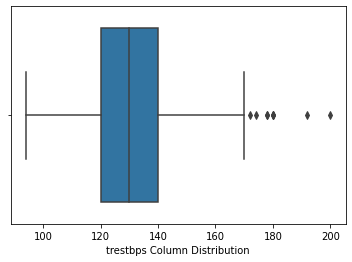

In [22]:
sns.boxplot('trestbps',data=df) 
plt.xlabel('trestbps Column Distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


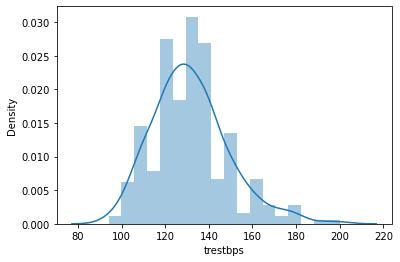

In [23]:
# Let's see the distribution of the data through a histogram
sns.distplot(df['trestbps']);

In [24]:
#skewness and kurtosis
print("Skewness: %f" % df['trestbps'].skew())
print("Kurtosis: %f" % df['trestbps'].kurt())

Skewness: 0.713768
Kurtosis: 0.929054


In [25]:
df["trestbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [26]:
#dividing the data into categories for extracting information.

bins  =   [90,101,112,123,134,145,156,167,178,189,200,211]
labels = ['Less than 100', '101-111','112-122','123-133','134-144','145-155','156-166','167-177','178-188','189-199','more than 200']
df['Max_pressure'] = pd.cut(df['trestbps'],right=False , bins= bins,labels = labels)
df['Max_pressure']

0      145-155
1      123-133
2      123-133
3      112-122
4      112-122
        ...   
298    134-144
299    101-111
300    134-144
301    123-133
302    123-133
Name: Max_pressure, Length: 303, dtype: category
Categories (11, object): ['Less than 100' < '101-111' < '112-122' < '123-133' ... '167-177' < '178-188' < '189-199' < 'more than 200']

<AxesSubplot:xlabel='Max_pressure', ylabel='count'>

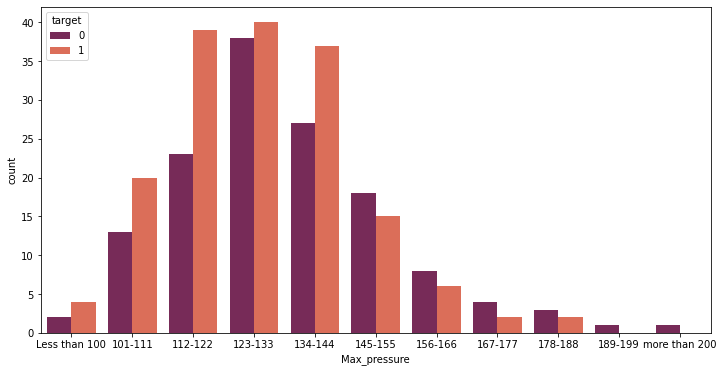

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x="Max_pressure",hue="target" , data=df,palette="rocket")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


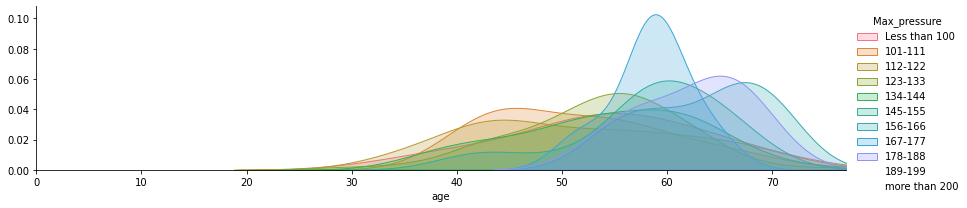

In [28]:
fig = sns.FacetGrid(df, hue="Max_pressure",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<AxesSubplot:xlabel='sex', ylabel='count'>

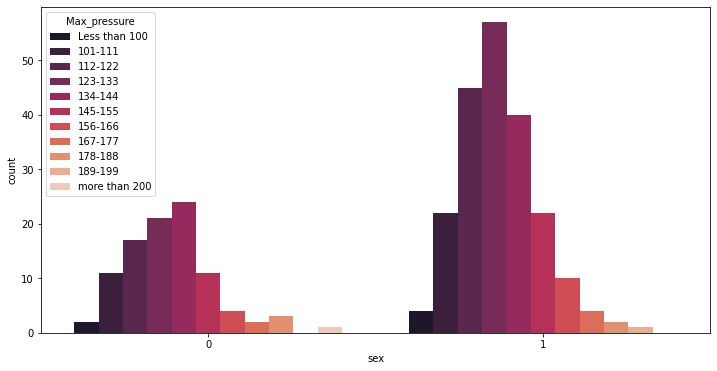

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x="sex",hue="Max_pressure" , data=df,palette="rocket")

<AxesSubplot:xlabel='target', ylabel='trestbps'>

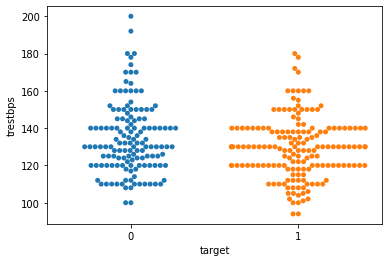

In [30]:
#Analysing the shape of the relationship between the column and the target column.
sns.swarmplot(x=df['target'],
              y=df['trestbps'])

In [31]:
#EDA ON cp COLUMN 

df["cp"].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [32]:
df["cp"].unique()

array([3, 2, 1, 0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cp', ylabel='count'>

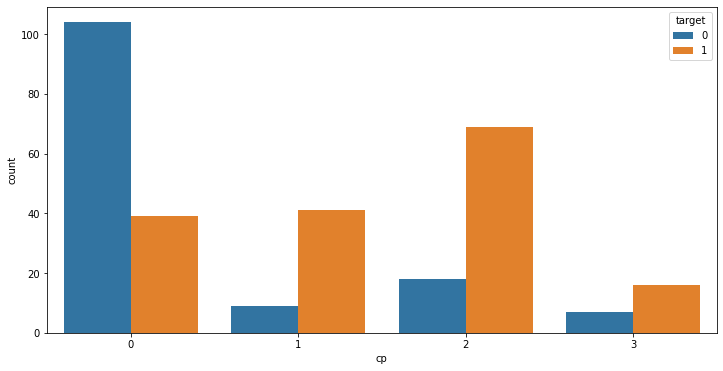

In [33]:
plt.figure(figsize=(12,6))
sns.countplot('cp', data= df, hue= 'target')

<AxesSubplot:xlabel='sex', ylabel='count'>

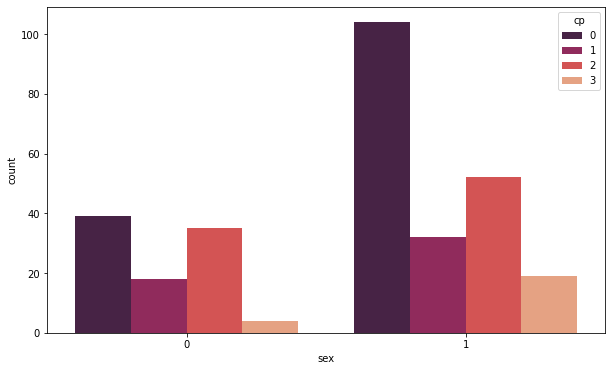

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x="sex",hue="cp" , data=df,palette="rocket")

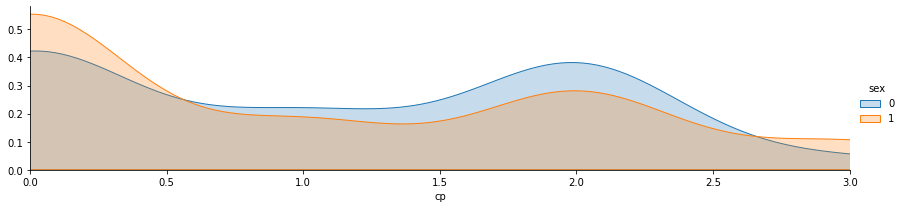

In [35]:
fig = sns.FacetGrid(df, hue="sex",aspect=4)
fig.map(sns.kdeplot,'cp',shade= True)
oldest = df['cp'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<AxesSubplot:xlabel='cp'>

<Figure size 720x432 with 0 Axes>

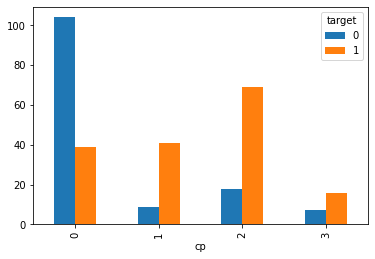

In [36]:
plt.figure(figsize=(10,6))
df.groupby('cp')['target'].value_counts(normalize=False).unstack().plot(kind='bar')

In [37]:
#EDA on the thalach (person's maximum heart rate) column

df["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'thalach Column Distribution')

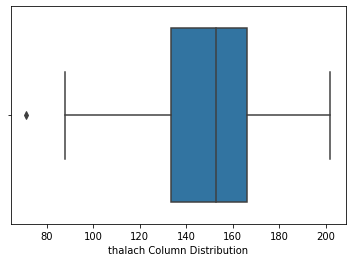

In [38]:
sns.boxplot('thalach',data=df) 
plt.xlabel('thalach Column Distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


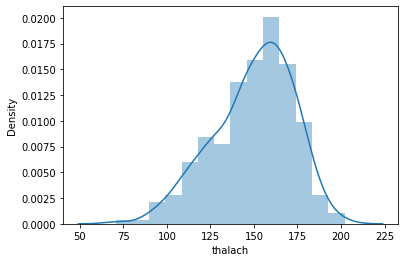

In [39]:
#Histogram distribution 
sns.distplot(df['thalach']);

In [40]:
#skewness and kurtosis
print("Skewness: %f" % df['thalach'].skew())
print("Kurtosis: %f" % df['thalach'].kurt())

df["thalach"].unique()

Skewness: -0.537410
Kurtosis: -0.061970


array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

<AxesSubplot:xlabel='target', ylabel='thalach'>

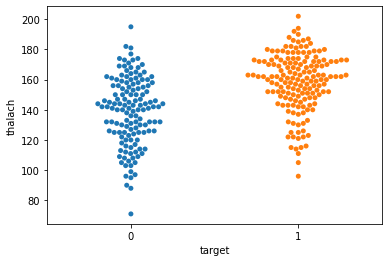

In [41]:
# Analysing the shape of the relationship between the column and the target column.
sns.swarmplot(x=df['target'],
              y=df['thalach'])

In [42]:
bins  =   [90,101,112,123,134,145,156,167,178,189,200,211]
labels = ['Less than 100', '101-111','112-122','123-133','134-144','145-155','156-166','167-177','178-188','189-199','more than 200']
df['Max_Heart_Rate'] = pd.cut(df['thalach'],right=False , bins= bins,labels = labels)
df['Max_Heart_Rate']

0      145-155
1      178-188
2      167-177
3      178-188
4      156-166
        ...   
298    123-133
299    123-133
300    134-144
301    112-122
302    167-177
Name: Max_Heart_Rate, Length: 303, dtype: category
Categories (11, object): ['Less than 100' < '101-111' < '112-122' < '123-133' ... '167-177' < '178-188' < '189-199' < 'more than 200']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Max_Heart_Rate', ylabel='count'>

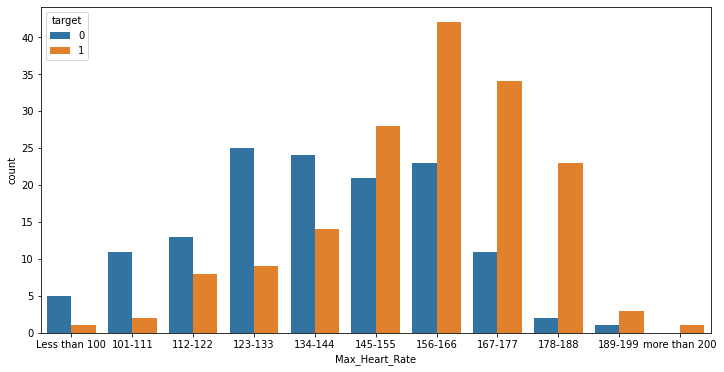

In [43]:
plt.figure(figsize=(12,6))
sns.countplot('Max_Heart_Rate', data =df,hue='target')

<AxesSubplot:xlabel='sex', ylabel='count'>

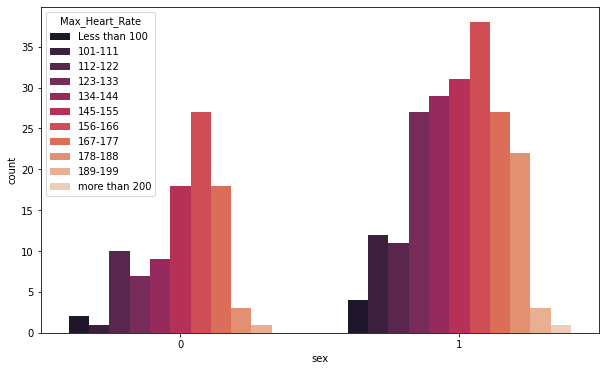

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x="sex",hue="Max_Heart_Rate" , data=df,palette="rocket")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


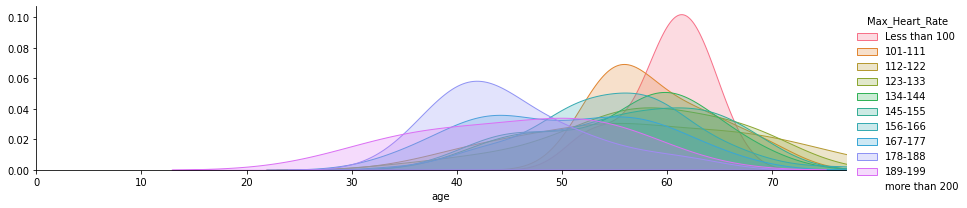

In [45]:
fig = sns.FacetGrid(df, hue="Max_Heart_Rate",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [46]:
bins  =   [29,41,53,65,78]
labels = ['29-40', '41-52','53-64','65-77']
df['Age_Group'] = pd.cut(df['age'],right=False , bins= bins,labels = labels)
df['Age_Group']

0      53-64
1      29-40
2      41-52
3      53-64
4      53-64
       ...  
298    53-64
299    41-52
300    65-77
301    53-64
302    53-64
Name: Age_Group, Length: 303, dtype: category
Categories (4, object): ['29-40' < '41-52' < '53-64' < '65-77']

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Max_pressure,Max_Heart_Rate,Age_Group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,145-155,145-155,53-64
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,123-133,178-188,29-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,123-133,167-177,41-52
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,112-122,178-188,53-64
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,112-122,156-166,53-64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_Group', ylabel='count'>

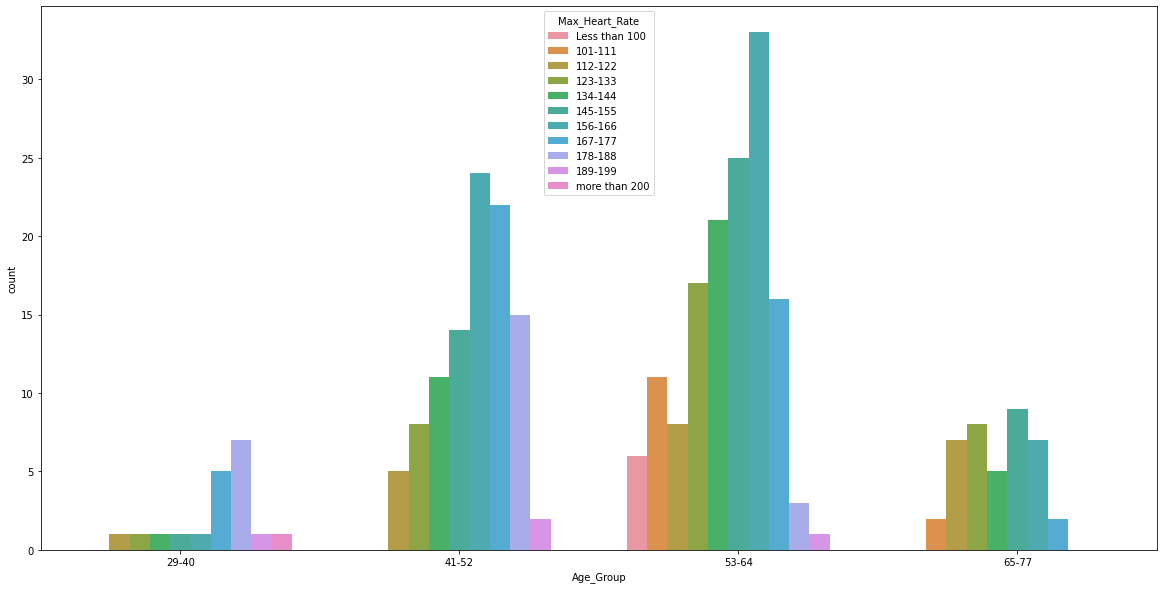

In [48]:
plt.figure(figsize=(20,10))
sns.countplot('Age_Group', data= df, hue= 'Max_Heart_Rate')

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

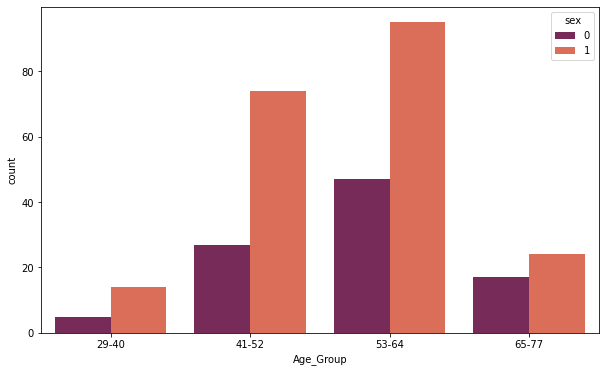

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x="Age_Group",hue="sex" , data=df,palette="rocket")

In [50]:
#Dropping one of our created columns after exploration 

df=df.drop(["Max_Heart_Rate"],axis=1)
df=df.drop(["Max_pressure"],axis=1)
df=df.drop(["Age_Group"],axis=1)

In [51]:
# Here we extracted the columns with outliers.
df_out = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df_out.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [52]:
infor = df.describe()

df2 = df[df.trestbps < infor.loc["mean", "trestbps"] + 3 * infor.loc["std", "trestbps"]]
df3 = df2[df.chol < infor.loc["mean", "chol"] + 3 * infor.loc["std", "chol"]]
df4 = df3[df.thalach > infor.loc["mean", "thalach"] - 3 * infor.loc["std", "thalach"]]
new_data = df4[df.oldpeak < infor.loc["mean", "oldpeak"] + 3 * infor.loc["std", "oldpeak"]]
new_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
#DATA SPLITTING 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
target=new_data["target"]
features=new_data.drop(["target"],axis=1)

# Here I do the data transformation.
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(features)

# Here I has reduced the amount of data used in the testing process because the data is very small
x_train,x_test,y_train,y_test=train_test_split(X,target,test_size=0.1,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(264, 13) (30, 13) (264,) (30,)


In [54]:
# MANUALLY CODING LOGISTIC REGRESSION MODEL 


y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [55]:
# Normalizing
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [56]:
#Transposing matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [57]:
#SIGMOID FUNCTION 

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [58]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients


In [59]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)
        parameters = {"weight": weight,"bias": bias}
        print("iteration:",iteration)
        print("cost:",cost)

        plt.plot(index,costList)
        plt.xlabel("Number of Iteration")
        plt.ylabel("Cost")
        plt.show()

    return parameters, gradients

In [60]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

iteration: 100
cost: 0.6931321909291238


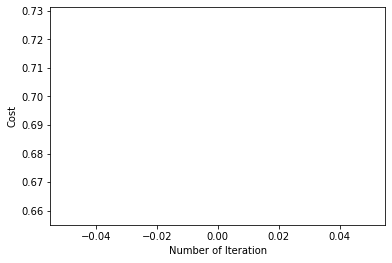

iteration: 100
cost: 0.6631860398911419


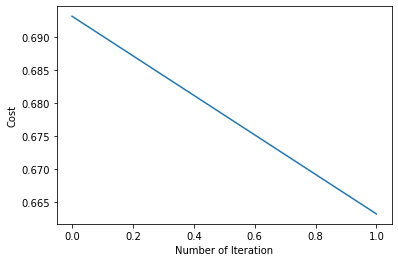

iteration: 100
cost: 0.637418854160672


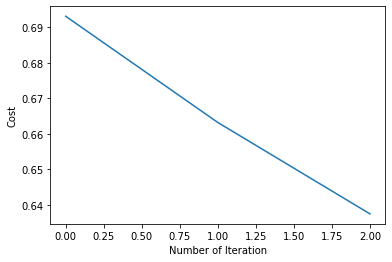

iteration: 100
cost: 0.6150461338492431


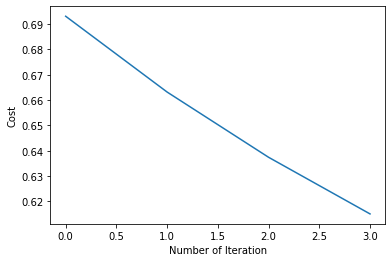

iteration: 100
cost: 0.595556195733343


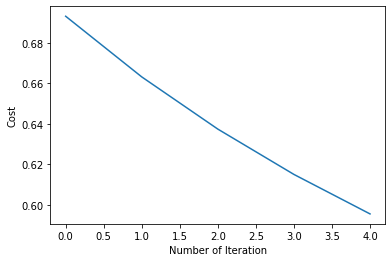

iteration: 100
cost: 0.5785100947910494


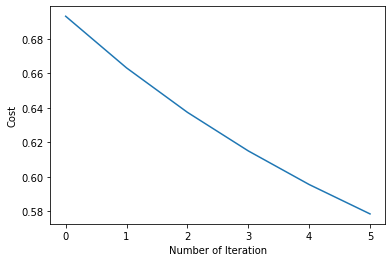

iteration: 100
cost: 0.5635356283976685


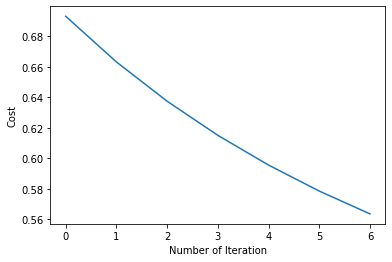

iteration: 100
cost: 0.5503196753881892


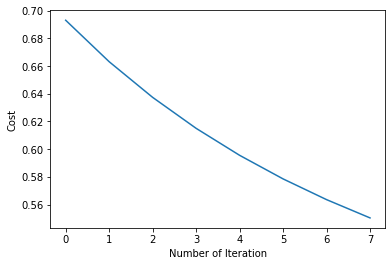

iteration: 100
cost: 0.5386000255064497


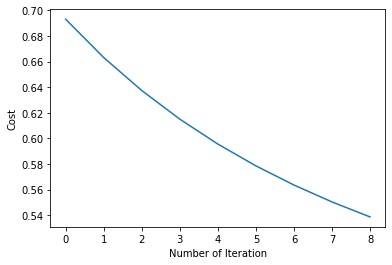

iteration: 100
cost: 0.5281575659645877


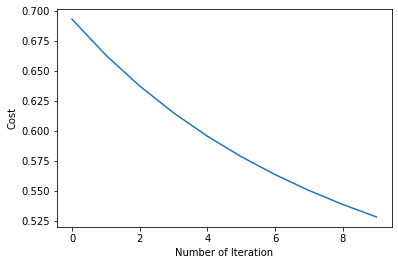

iteration: 100
cost: 0.5188092491743166


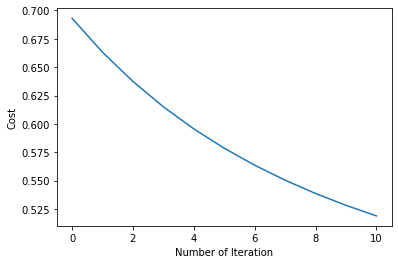

iteration: 100
cost: 0.5104019936071096


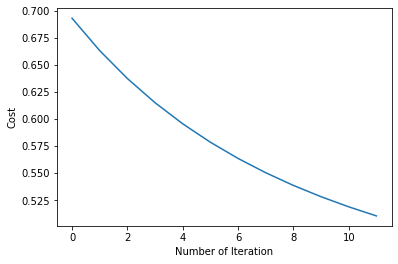

iteration: 100
cost: 0.5028075170584617


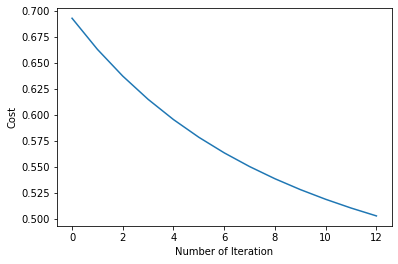

iteration: 100
cost: 0.4959180254503887


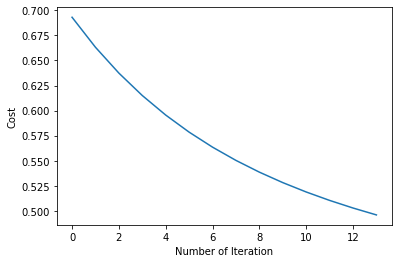

iteration: 100
cost: 0.4896426496817628


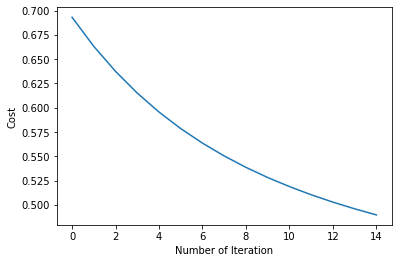

iteration: 100
cost: 0.48390451753329117


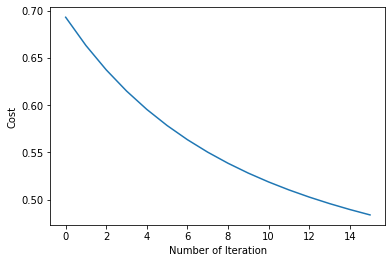

iteration: 100
cost: 0.4786383547361277


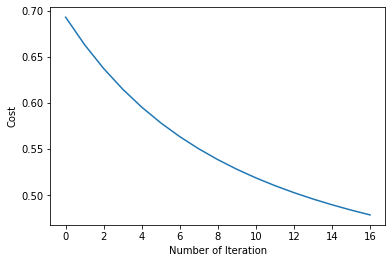

iteration: 100
cost: 0.4737885217733687


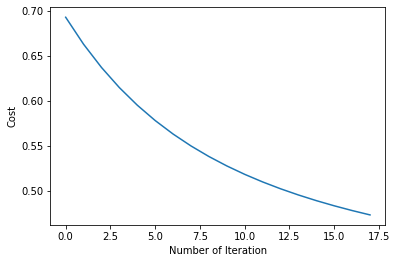

iteration: 100
cost: 0.4693074068532139


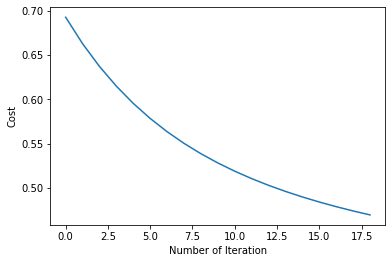

iteration: 100
cost: 0.46515410878437013


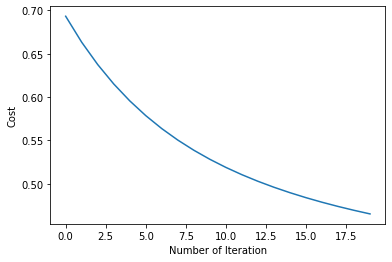

iteration: 100
cost: 0.4612933553257799


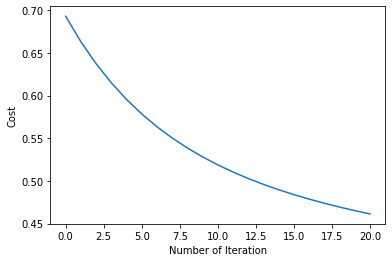

iteration: 100
cost: 0.4576946127032763


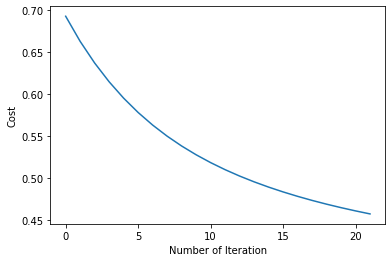

iteration: 100
cost: 0.4543313504181477


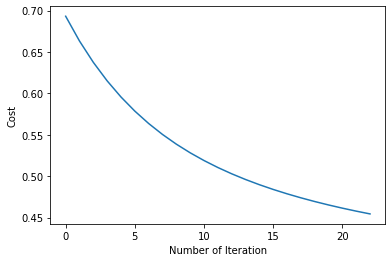

iteration: 100
cost: 0.45118043238593225


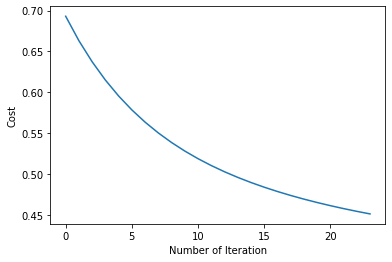

iteration: 100
cost: 0.44822161105358715


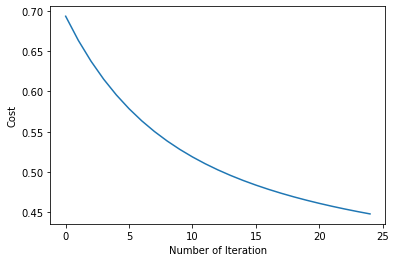

iteration: 100
cost: 0.4454371056660314


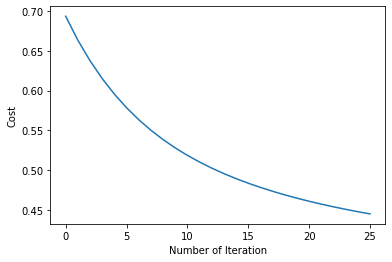

iteration: 100
cost: 0.4428112494858148


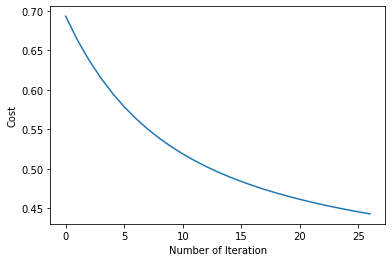

iteration: 100
cost: 0.44033019368194376


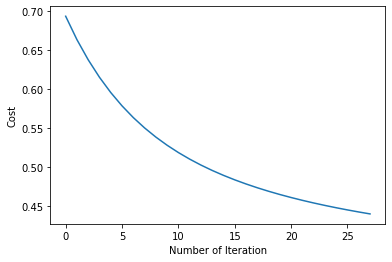

iteration: 100
cost: 0.4379816579373531


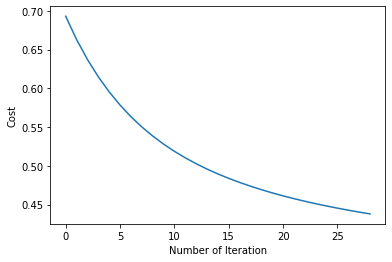

iteration: 100
cost: 0.4357547196950234


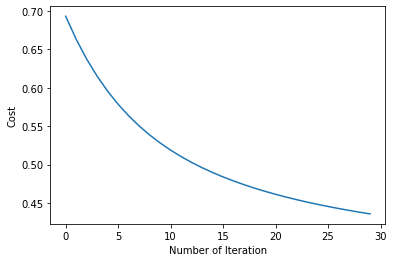

iteration: 100
cost: 0.43363963546395834


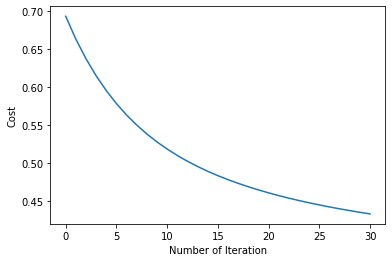

iteration: 100
cost: 0.43162768881312746


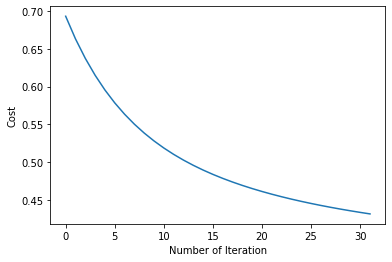

iteration: 100
cost: 0.42971106065383896


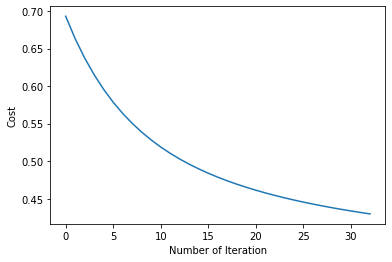

iteration: 100
cost: 0.4278827181962959


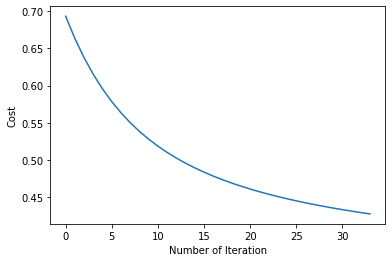

iteration: 100
cost: 0.42613631960197607


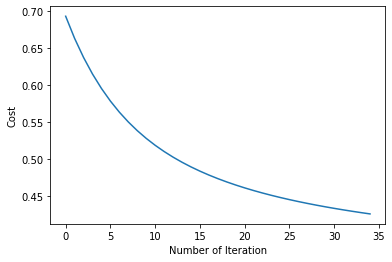

iteration: 100
cost: 0.42446613186982207


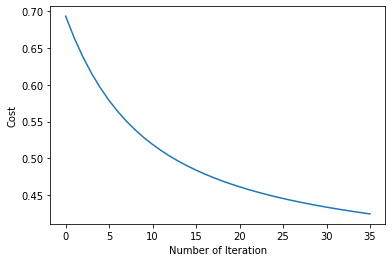

iteration: 100
cost: 0.4228669599147103


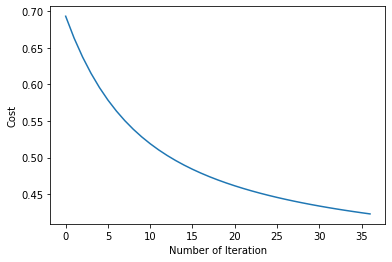

iteration: 100
cost: 0.42133408514009957


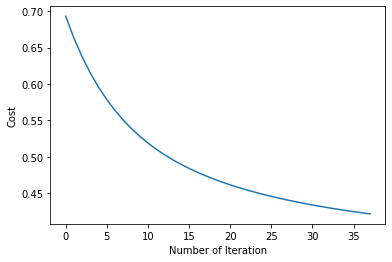

iteration: 100
cost: 0.4198632120881006


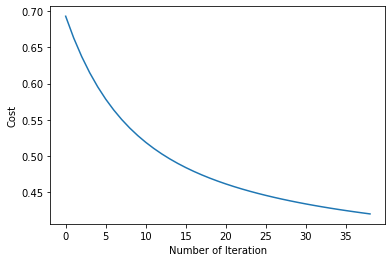

iteration: 100
cost: 0.4184504219813703


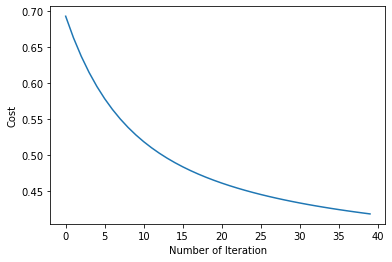

iteration: 100
cost: 0.41709213216173746


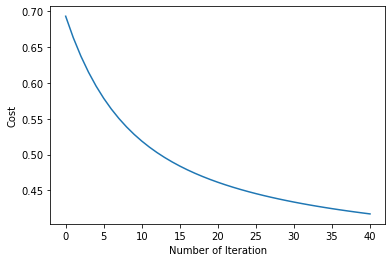

iteration: 100
cost: 0.41578506058793396


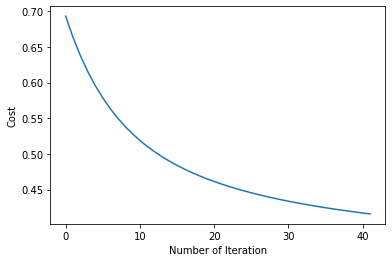

iteration: 100
cost: 0.41452619468534246


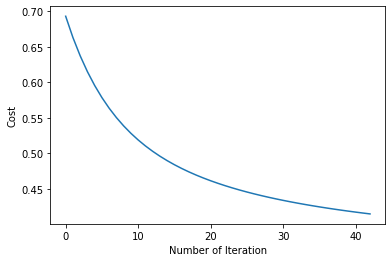

iteration: 100
cost: 0.4133127639492053


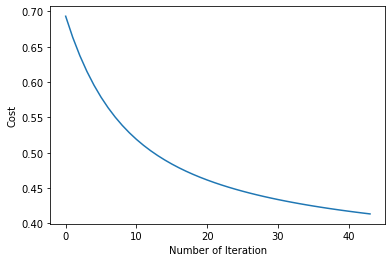

iteration: 100
cost: 0.41214221579323074


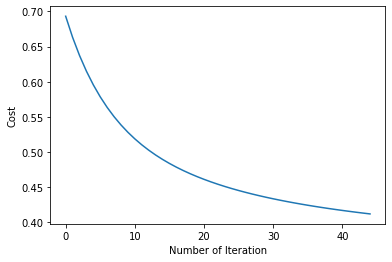

iteration: 100
cost: 0.4110121942111984


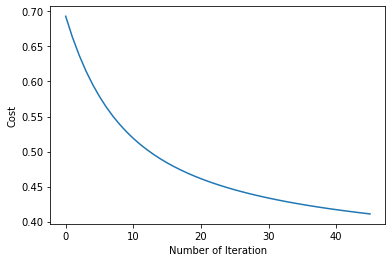

iteration: 100
cost: 0.40992052088260583


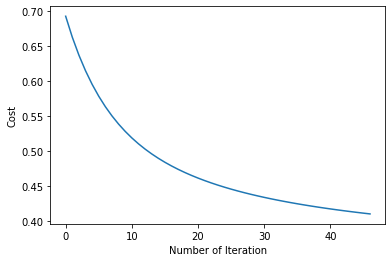

iteration: 100
cost: 0.4088651784067375


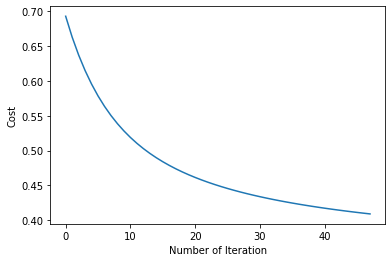

iteration: 100
cost: 0.4078442953944918


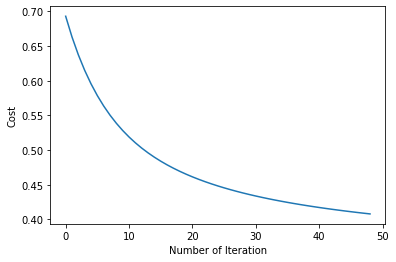

iteration: 100
cost: 0.40685613318530234


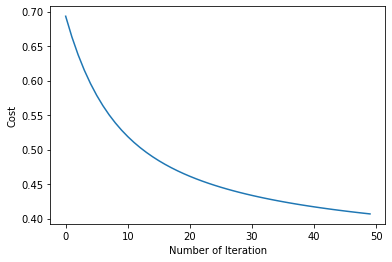

iteration: 100
cost: 0.4058990739886824


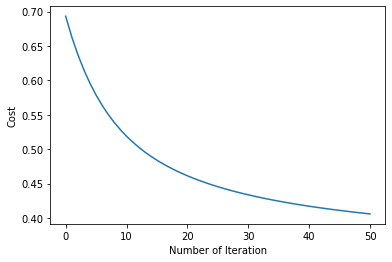

iteration: 100
cost: 0.40497161027726447


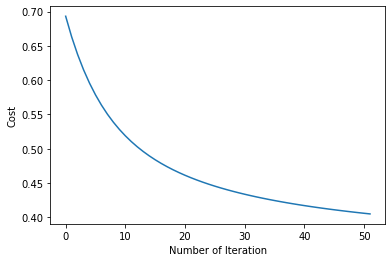

iteration: 100
cost: 0.40407233528148767


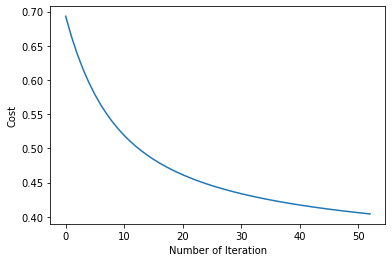

iteration: 100
cost: 0.40319993445595775


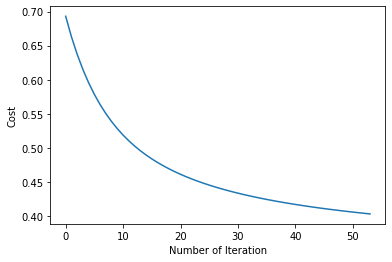

iteration: 100
cost: 0.40235317780449703


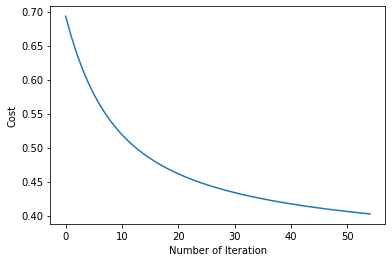

iteration: 100
cost: 0.4015309129654742


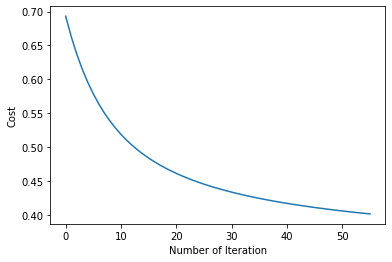

iteration: 100
cost: 0.40073205897152325


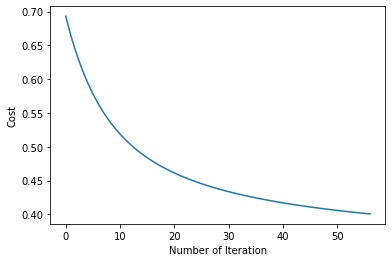

iteration: 100
cost: 0.3999556006085407


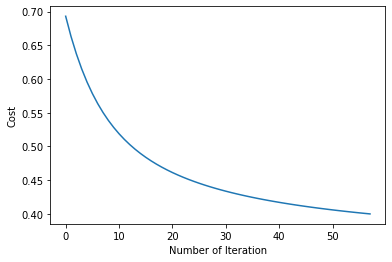

iteration: 100
cost: 0.3992005833081493


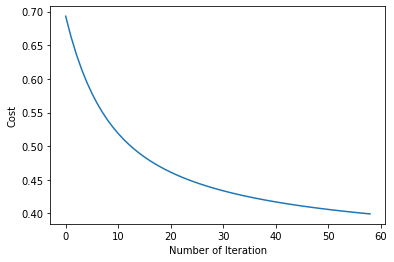

iteration: 100
cost: 0.39846610851586206


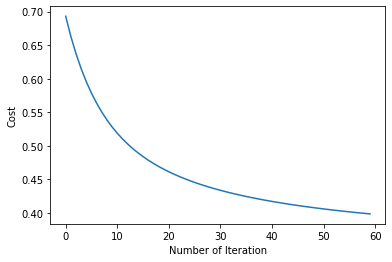

iteration: 100
cost: 0.39775132948414377


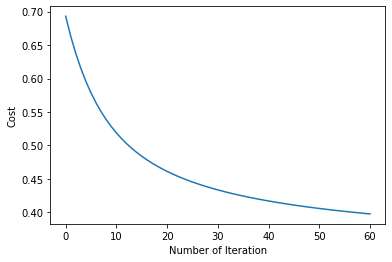

iteration: 100
cost: 0.3970554474456145


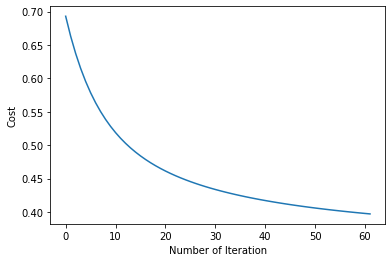

iteration: 100
cost: 0.3963777081269019


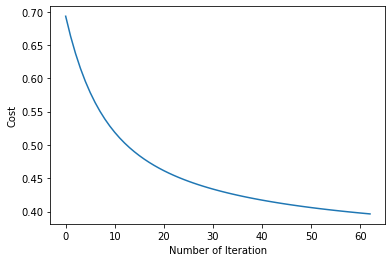

iteration: 100
cost: 0.39571739856822563


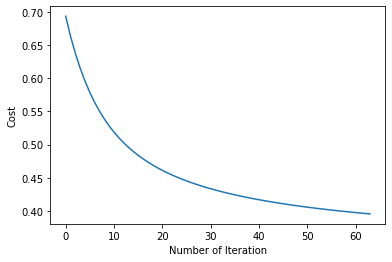

iteration: 100
cost: 0.3950738442178009


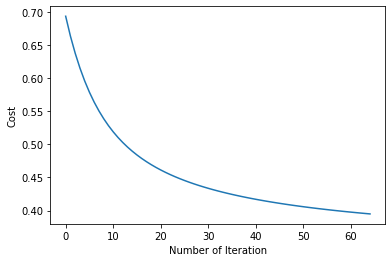

iteration: 100
cost: 0.3944464062736415


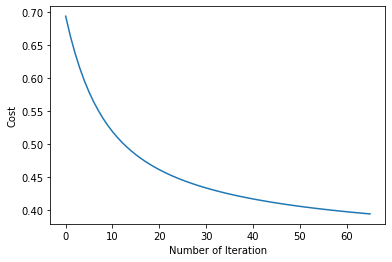

iteration: 100
cost: 0.39383447924840853


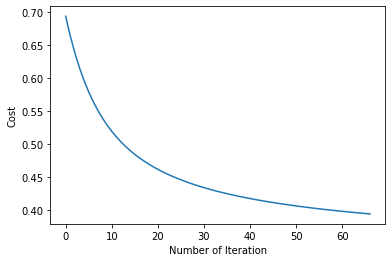

iteration: 100
cost: 0.3932374887356338


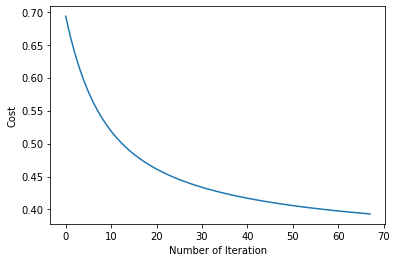

iteration: 100
cost: 0.3926548893580133


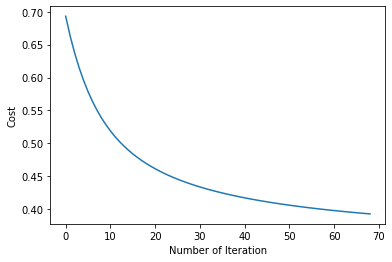

iteration: 100
cost: 0.3920861628805404


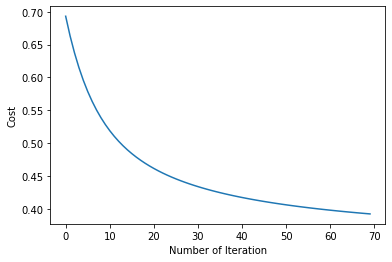

iteration: 100
cost: 0.391530816473082


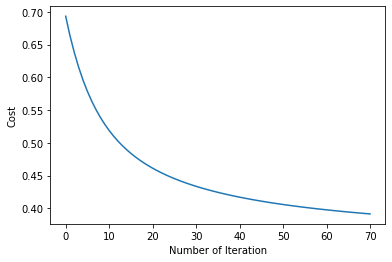

iteration: 100
cost: 0.39098838110862133


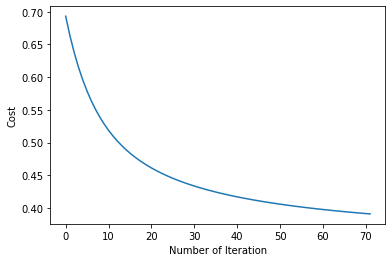

iteration: 100
cost: 0.39045841008481613


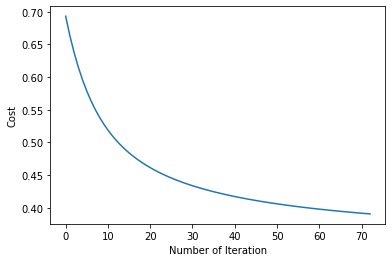

iteration: 100
cost: 0.38994047765779494


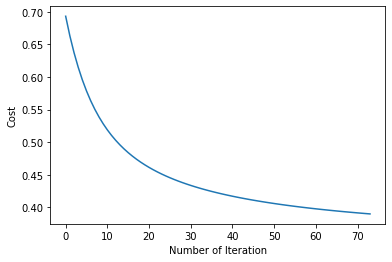

iteration: 100
cost: 0.38943417777823175


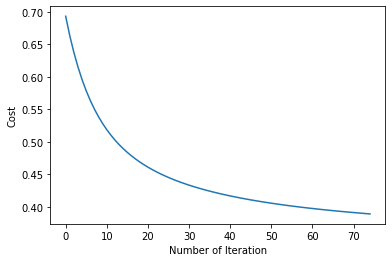

iteration: 100
cost: 0.38893912292074034


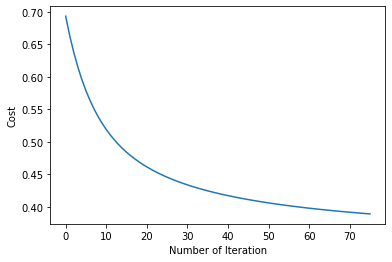

iteration: 100
cost: 0.3884549429985171


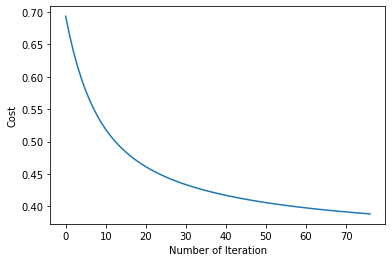

iteration: 100
cost: 0.3879812843559499


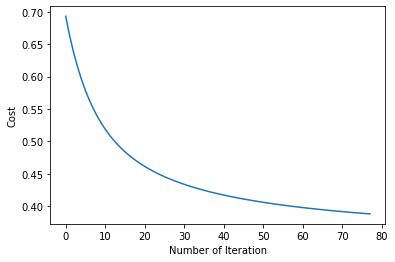

iteration: 100
cost: 0.3875178088326173


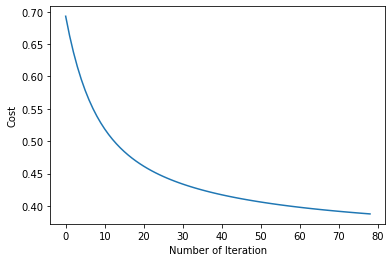

iteration: 100
cost: 0.38706419289273


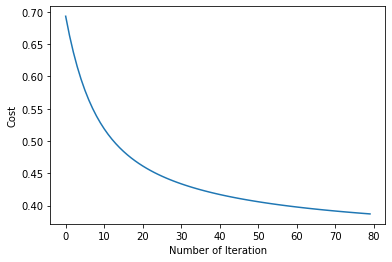

iteration: 100
cost: 0.3866201268146303


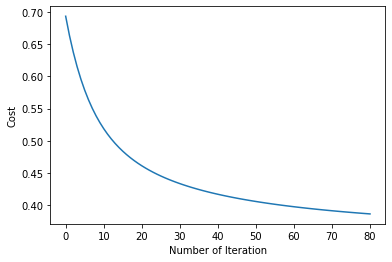

iteration: 100
cost: 0.3861853139354685


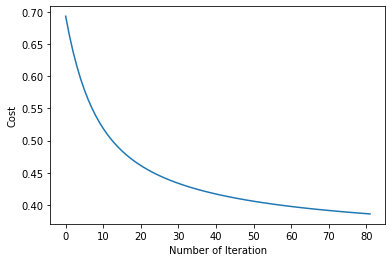

iteration: 100
cost: 0.38575946994662635


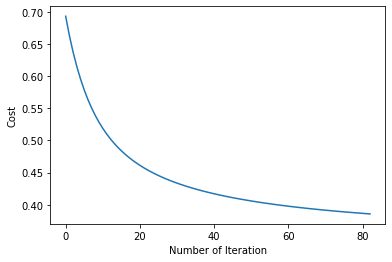

iteration: 100
cost: 0.38534232223586423


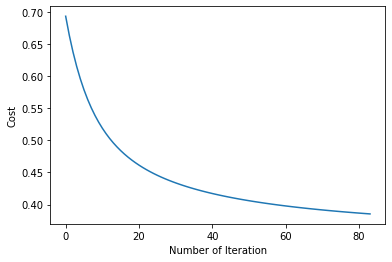

iteration: 100
cost: 0.38493360927252884


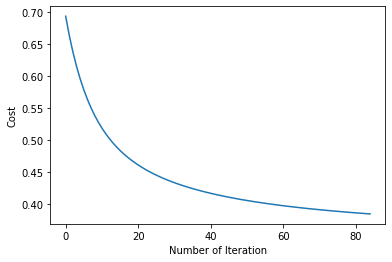

iteration: 100
cost: 0.3845330800324928


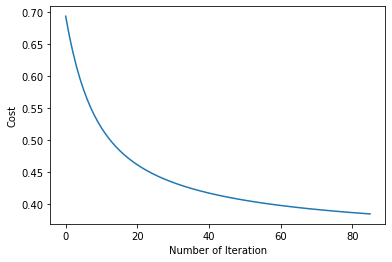

iteration: 100
cost: 0.38414049345978224


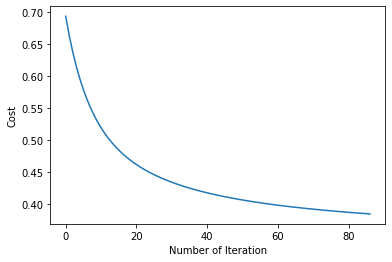

iteration: 100
cost: 0.3837556179621253


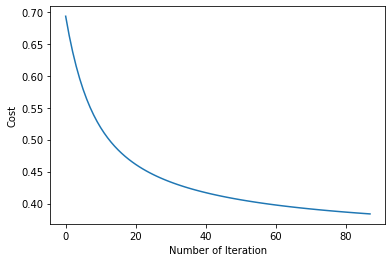

iteration: 100
cost: 0.3833782309378843


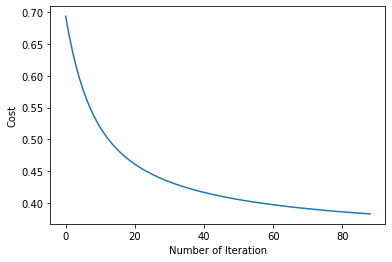

iteration: 100
cost: 0.38300811833205867


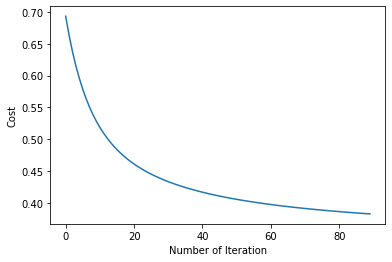

iteration: 100
cost: 0.38264507421923805


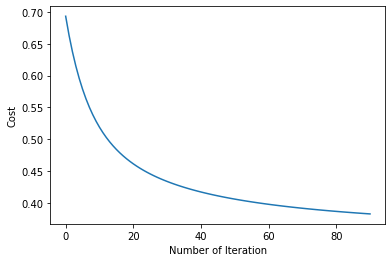

iteration: 100
cost: 0.38228890041156144


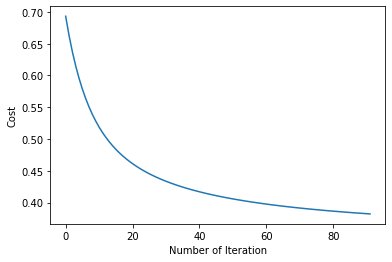

iteration: 100
cost: 0.38193940608990384


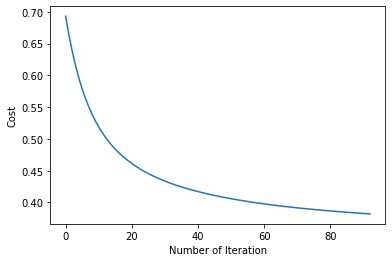

iteration: 100
cost: 0.3815964074566524


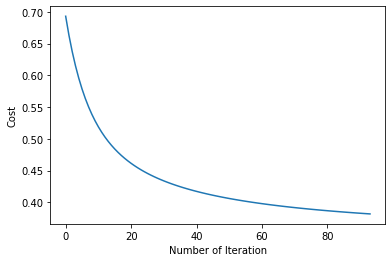

iteration: 100
cost: 0.3812597274085703


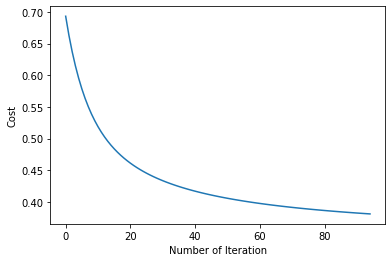

iteration: 100
cost: 0.38092919522836555


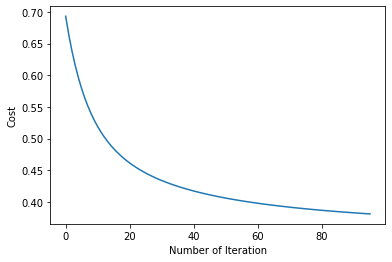

iteration: 100
cost: 0.3806046462936927


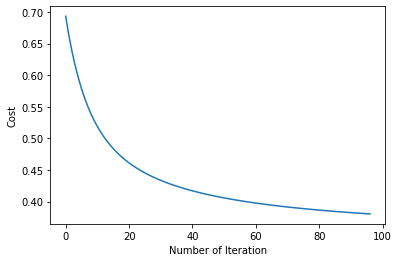

iteration: 100
cost: 0.3802859218024138


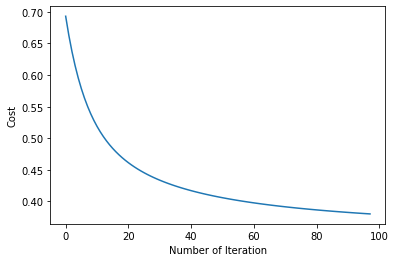

iteration: 100
cost: 0.37997286851303697


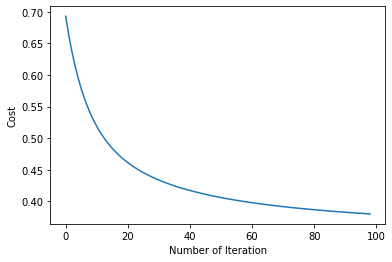

iteration: 100
cost: 0.37966533849933537


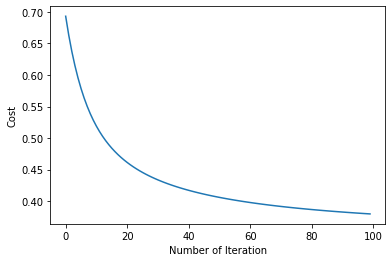

Manuel Test Accuracy: 81.97%


In [61]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))
    
    
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [62]:
#SKLEARN LOGISTIC REGRESSION 

accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 83.61%


2 NN Score: 83.61%


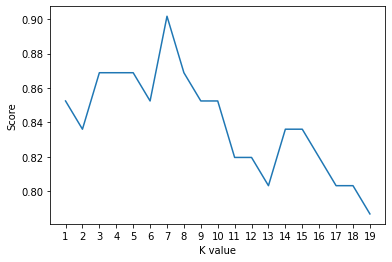

Maximum KNN Score is 90.16%


In [63]:
#KNN Model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [64]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 85.25%


In [65]:
#SVC ALGORITHM

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 83.61%


In [66]:
#DECISION TREE ALGORITHM 

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 75.41%


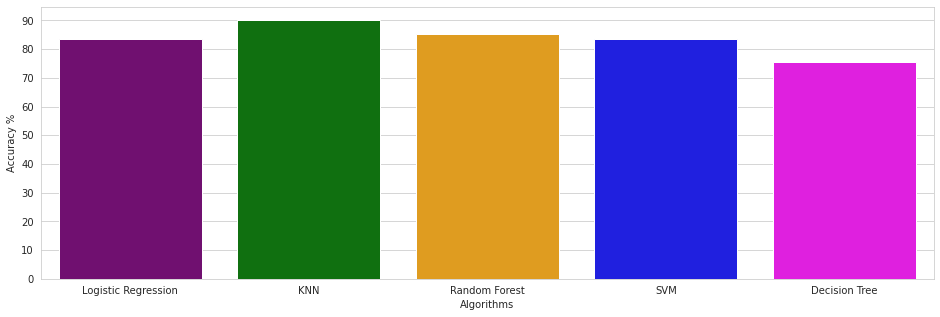

In [67]:
colors = ["purple", "green", "orange", "blue", "magenta","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()